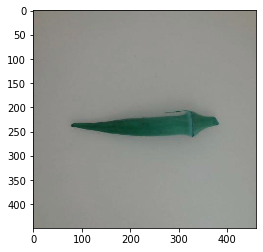

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from skimage.color import rgb2gray
%matplotlib inline
from scipy import ndimage

DATADIR = "/Users/ieuser/okraclassification/okra_image"

CATEGORIES = ["a_class", "b_class"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) )  
        plt.imshow(img_array, cmap='gray')  

        break  
    break  

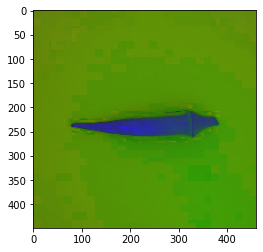

In [ ]:
image= np.array(img_array)
   
#HSV_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 
HLS_img = cv2.cvtColor(image, cv2.COLOR_BGR2HLS) #CV_BGR2HLS equivalent to HSI
#image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)

# displaying the Hsv format image
plt.imshow(HLS_img)

In [ ]:
h,l,s = cv2.split(HLS_img)
r,g,b = cv2.split(image)

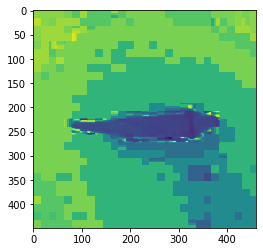

In [ ]:
plt.imshow(h)

In [ ]:
############
###########
##########
#########
########
#######
######
#####
####
###
##
#
#
#import cv2
#import numpy as np
#import imutils

#img = cv2.imread("/Users/ieuser/okraclassification/okra_image/a_type/A_M_07_01_02_61.jpeg")
#hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#lower_range = np.array([20,30,40])
#upper_range = np.array([200,255,120])
#mask = cv2.inRange(hsv, lower_range, upper_range)

# Bitwise-AND mask and original image
#res = cv2.bitwise_and(img,img, mask= mask)

#cv2.imshow('image', img)
#cv2.imshow('mask', mask)
#cv2.imshow('res', res)

#while(True):
#   k = cv2.waitKey(5) & 0xFF
#   if k == 27:
#      break

#cv2.destroyAllWindows()

In [ ]:
#HLS_img_b = cv2.cvtColor(res, cv2.COLOR_BGR2HLS)
#plt.imshow(HLS_img_b)

(449, 460, 3)


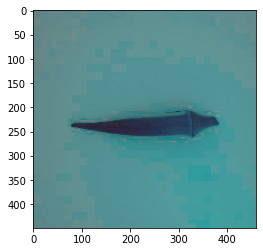

In [ ]:
images = cv2.merge((h,l,g))
plt.imshow(images)
print(images.shape)

#640x480 

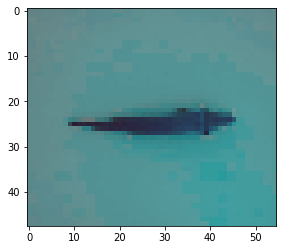

(48, 55, 3)


In [ ]:

IMG_LONG = 55
IMG_LARGE = 48

new_array = cv2.resize(images, (IMG_LONG, IMG_LARGE))
plt.imshow(new_array, cmap='gray')
plt.show()
print(new_array.shape)

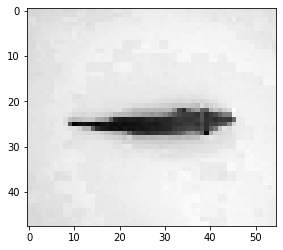

In [ ]:
gray = rgb2gray(new_array)
plt.imshow(gray, cmap='gray')

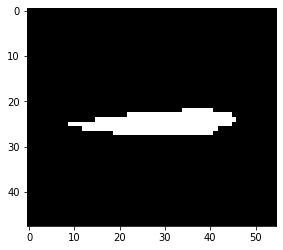

In [ ]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > np.amax(gray_r)*0.43:
        gray_r[i] = 0
    else:
        gray_r[i] = 1
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

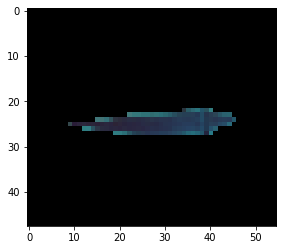

In [ ]:
extract_img = np.zeros(new_array.shape, dtype='uint8')
for i in [0,1,2]:
    extract_img[:,:,i] = new_array[:,:,i]*gray
    plt.imshow(extract_img)

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category) 

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array ->  ,cv2.IMREAD_GRAYSCALE for grayscaling
                HLS_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2HLS)
                h,l,s = cv2.split(HLS_img)
                r,g,b = cv2.split(img_array)
                new_array = cv2.merge((h,l,g))
                new_array = cv2.resize(new_array, (IMG_LONG, IMG_LARGE))  # resize to normalize data size
                #gray = rgb2gray(new_array)
                #gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
                #for i in range(gray_r.shape[0]):
                    #if gray_r[i] > np.amax(gray_r)*0.43:
                    #if gray_r[i] > gray_r.mean():
                   #     gray_r[i] = 0
                  #  else:
                 #       gray_r[i] = 1
                #gray = gray_r.reshape(gray.shape[0],gray.shape[1])
                #extract_img = np.zeros(new_array.shape, dtype='uint8')
                #for i in [0,1,2]:
                 #   extract_img[:,:,i] = new_array[:,:,i]*gray
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 3040/3040 [00:08<00:00, 373.79it/s]

6332


In [ ]:
import random

random.shuffle(training_data)

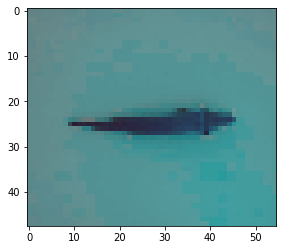

In [ ]:
plt.imshow(new_array)

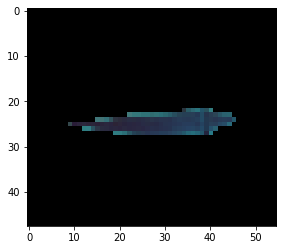

In [ ]:
plt.imshow(extract_img, cmap='gray')
plt.show()

In [ ]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
0
0
0
0
1
1
1


In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_LONG, IMG_LARGE, 3))

X = np.array(X).reshape(-1, IMG_LARGE, IMG_LONG, 3)

[[[[103 133 133]
   [103 134 134]
   [101 136 137]
   ...
   [ 30 170 171]
   [ 30 170 171]
   [ 30 170 171]]

  [[ 50 172 173]
   [ 67 171 172]
   [ 75 171 172]
   ...
   [ 30 168 169]
   [ 50 170 171]
   [ 50 170 171]]

  [[ 30 170 171]
   [ 30 170 171]
   [ 30 170 171]
   ...
   [ 75 163 164]
   [ 75 163 164]
   [ 75 164 165]]

  ...

  [[ 66 146 148]
   [ 66 147 149]
   [ 66 147 149]
   ...
   [ 80 131 134]
   [ 80 134 137]
   [ 80 135 138]]

  [[ 82 136 138]
   [ 82 136 138]
   [ 82 137 139]
   ...
   [ 80 141 144]
   [ 80 142 145]
   [ 80 145 148]]

  [[ 80 145 148]
   [ 80 145 148]
   [ 80 147 151]
   ...
   [ 55 149 152]
   [ 55 148 151]
   [ 55 147 150]]]]


In [ ]:
y = np.array(y)
X.shape

(6332, 48, 55, 3)

In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import time
import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                              patience=6, min_lr=0.01)

early_stop = EarlyStopping(monitor='val_acc', 
                           min_delta=0, 
                           patience=6, 
                           verbose=0, 
                           mode='auto',
                           baseline=None,
                           restore_best_weights=True,)

model.compile(loss='binary_crossentropy',
              optimizer='nadam',
              metrics=['accuracy']
             )
             

model.fit(X, y, batch_size=32, 
          epochs=50, 
          validation_split=0.2,
          callbacks=[early_stop])
model.save('64x3-CNN.model')

#plot "time" on one axis and accuracy on the other
#plot "accuracy" on on axis and 
# show images that were not clasifeid correctly

#the resizing of the image is strongly correlated with the accuracy. At 50*46 which is proportional to the inital image, the accuracy was 89%. At 64*48, it's 96%

/Users/ieuser/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ieuser/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ieuser/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ieuser/miniconda3/env

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5065 samples, validate on 1267 samples
Epoch 1/50
5065/5065 [==============================] - 10s 2ms/sample - loss: 0.6205 - acc: 0.6432 - val_loss: 0.6179 - val_acc: 0.6732
Epoch 2/50
5065/5065 [==============================] - 9s 2ms/sample - loss: 0.4899 - acc: 0.7643 - val_loss: 0.5243 - val_acc: 0.7293
Epoch 3/50
5065/5065 [==============================] - 9s 2ms/sample - loss: 0.4204 - acc: 0.8180 - val_loss: 0.3799 - val_acc: 0.8240
Epoch 4/50
5065/5065 [==============================] - 9s 2ms/sample - loss: 0.3752 - acc: 0.8393 - val_loss: 0.3675 - val_acc: 0.8224
Epoch 5/50
5065/5065 [==============================] - 9s 2ms/sample - loss: 0.3408 - acc: 0.8543 - val_loss: 0.5819 - val_acc: 0.7309
Epoch 6/50
5065/5065 [==============================] - 9s 

In [ ]:
#
##
###
####
#####
######
#######
########
#########
##########
###########
############
###########
##########
#########
########
#######
######
#####
####
###
##
#

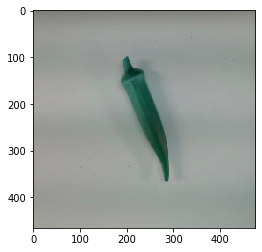

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from skimage.color import rgb2gray
%matplotlib inline
from scipy import ndimage

DATADIR = "/Users/ieuser/okraclassification/okra_image"

CATEGORIES = ["a_class2", "b_class2"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path): 
        img_arrayt = cv2.imread(os.path.join(path,img) ) 
        plt.imshow(img_arrayt, cmap='gray')  
        plt.show() 

        break  
    break 

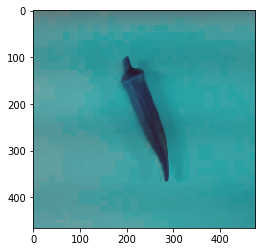

In [ ]:
rt,gt,bt = cv2.split(img_arrayt)
HLS_imgt = cv2.cvtColor(img_arrayt, cv2.COLOR_BGR2HLS)
ht,lt,st = cv2.split(HLS_imgt)
newt_array = cv2.merge((ht,lt,gt))
plt.imshow(newt_array)

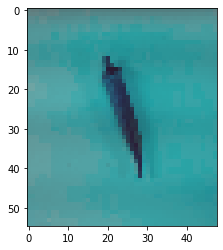

In [ ]:
newt_array = cv2.resize(newt_array, (IMG_LARGE, IMG_LONG))
plt.imshow(newt_array)

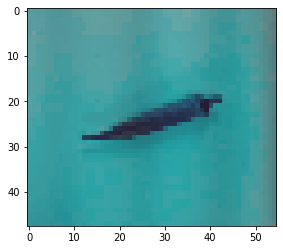

In [ ]:
newt_array = cv2.rotate(newt_array, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(newt_array)

In [ ]:
testing_data = []

DATADIR = "/Users/ieuser/okraclassification/okra_image"

CATEGORIES = ["a_class2", "b_class2"]

def create_testing_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                image_array = cv2.imread(os.path.join(path,img))  
                HLS_img = cv2.cvtColor(image_array, cv2.COLOR_BGR2HLS)
                h,l,s = cv2.split(HLS_img)
                r,g,b = cv2.split(image_array)
                newt_array = cv2.merge((h,l,g))
                #newt_array = cv2.rotate(newt_array, cv2.ROTATE_90_CLOCKWISE)
                newt_array = cv2.resize(newt_array, (IMG_LARGE, IMG_LONG)) 
                newt_array = cv2.rotate(newt_array, cv2.ROTATE_90_CLOCKWISE)
                #print(newt_array.shape)
                testing_data.append([newt_array, class_num])
                
            except Exception as e:  
                pass
            

create_testing_data()

print(len(testing_data))

100%|██████████| 507/507 [00:01<00:00, 298.56it/s]

758


In [ ]:
import random

random.shuffle(testing_data)

In [ ]:
for sample in testing_data[:10]:
    print(sample[1])

0
1
1
0
0
1
1
0
1
0


In [ ]:
A = []
b = []

for features,label in testing_data:
    A.append(features)
    b.append(label)

#print(A[0].reshape(-1, IMG_LARGE, IMG_LONG, 3))

A = np.array(A)#.reshape(-1, IMG_LARGE, IMG_LONG, 3)
b = np.array(b)

In [ ]:
A = A/255.0
print(A.shape)
#print((A[0]))

(758, 48, 55, 3)


In [ ]:
#model = tf.keras.models.load_model("64x3-CNN.model")

predicted_classes = model.predict(A)

In [ ]:
predicted_classes = np.around(predicted_classes, decimals= 0)
predicted_classes = predicted_classes.astype(int)

prdcls = []
for a in predicted_classes:
    for c in a:
        prdcls.append(c)

In [ ]:
predicted_classes.shape, b.shape

((758, 1), (758,))

In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

prdcls = np.array(prdcls)
predicted_classes = prdcls
print(predicted_classes)

[0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1
 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1
 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 

In [ ]:
print(b)

[0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1
 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0
 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1
 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1
 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0
 0 1 0 0 1 1 1 1 1 0 1 0 

758
Found 284 incorrect labels
Incorrect = 37 %


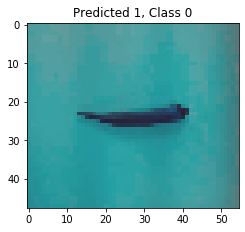

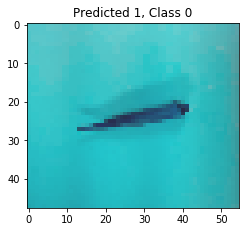

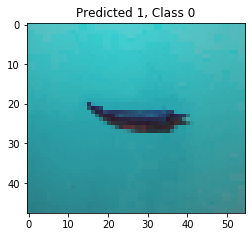

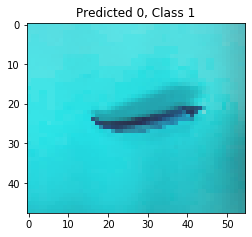

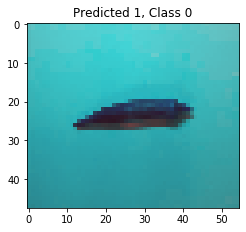

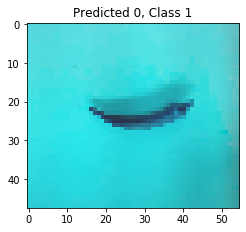

In [ ]:
#X = np.array(X).reshape(-1, IMG_LARGE, IMG_LONG, 3)
incorrect = np.where(predicted_classes!= b)[0]
print(len(predicted_classes))
print ("Found %d incorrect labels" % len(incorrect))
print("Incorrect =", int((len(incorrect)*100)/len(predicted_classes)),"%")
for i, incorrect in enumerate(incorrect[:6]):
    plt.figure(figsize=(10,9))
    plt.subplot(3,2,i+1)
    plt.imshow(A[incorrect], cmap='gray', interpolation='nearest')
    #plt.imshow()
    #print(A[incorrect])
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], b[incorrect]))
    plt.tight_layout()

In [ ]:
def prepare(filepath):
    
    IMG_LONG = 48
    IMG_LARGE = 64
    img_array = cv2.imread(filepath)
    HLS_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2HLS)
    h,l,s = cv2.split(HLS_img)
    r,g,b = cv2.split(img_array)
    new_array = cv2.merge((h,l,g))
    new_array = cv2.resize(new_array, (IMG_LONG, IMG_LARGE))
    
    return new_array.reshape(-1, IMG_LONG, IMG_LARGE, 3)


model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict([prepare('/Users/ieuser/okraclassification/okra_image/a_class2/A_M_06_11_1.jpeg')])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
[[0.]]
a_class2
